# **FB-31 Vasalatii Anton, Task 2** 
___
## ***Dataset*** 
**Source**: Chen, S. (2015). Beijing PM2.5 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JS49.

**General**: This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.  

**Subject Area**: Climate and Environment  

**Associated Tasks**:  Regression

**Dataset Characteristics**: Multivariate, Time-Series  

**Instances**: 43824  

**Columns count**: 13 

**Missing values**: Yes  

**Additional info**: The data's time period is between Jan 1st, 2010 to Dec 31st, 2014. Missing data are denoted as "NA".
___
### **Variables info**
**No**: row number

**year**: year of data in this row

**month**: month of data in this row

**day**: day of data in this row

**hour**: hour of data in this row

**pm2.5**: PM2.5 concentration

**DEWP**: Dew Point

**TEMP**: Temperature

**PRES**: Pressure

**cbwd**: Combined wind direction

**Iws**: Cumulated wind speed  

**Is**: Cumulated hours of snow

**Ir**: Cumulated hours of rain  
___

**Setup imports**

In [31]:
import numpy as np
from colorama import Fore, Style
import pandas as pd
import tabulate
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import MinMaxScaler

**Additional functions that use python-tabulate and colorama to make output beautiful** 

In [32]:
def print_df(frame):
    print(Fore.LIGHTCYAN_EX + tabulate.tabulate(frame, headers='keys', tablefmt="heavy_grid", showindex=False) + Style.RESET_ALL)

In [33]:
def print_delimiter():
    print(Fore.LIGHTMAGENTA_EX+"_"*135+"\n"+Style.RESET_ALL)

In [34]:
def print_double_delimiter():
    print(Fore.LIGHTYELLOW_EX+"_"*135+"\n"+"_"*135+Style.RESET_ALL)

In [35]:
def print_green_cyan_colored_pair(tag, value, indentation=''):
    print(indentation + Fore.LIGHTGREEN_EX + tag + " " + Fore.CYAN + str(value) + Style.RESET_ALL)

**Parsing data with Pandas**  
Here we read cleaned data from previous task

In [36]:
headers = ['No', 'Year', 'Month', 'Day', 'Hour', 'PM2.5', 'DEWP', 'TEMP', 'PRES', 'CBWD', 'IWS','IS','IR']
df = pd.read_csv("beijing_pm_2_5_cleared.csv",delimiter=",",index_col=False, header=1, na_values=['NA'], names=headers)

df[['PM2.5_orig', 'TEMP_orig']] = df[['PM2.5', 'TEMP']]

scaler = MinMaxScaler()

cols_to_scale = ['PM2.5', 'TEMP']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

**KMeans**  
First of all we need to find number of clusters to use. We are going to do it with Elbow method.  
***Type of metric that is used by sklearn KMeans during calculations is Euclidean***

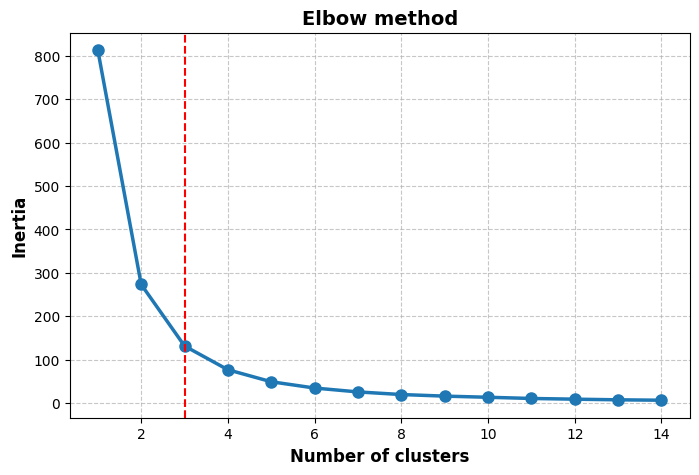

In [37]:
inertias = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(df[["PM2.5"]])
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1,15), inertias, marker='o', markersize=8,linewidth=2.5,)
plt.axvline(x=3, color='r', linestyle='--')
plt.title('Elbow method', fontweight="bold", fontsize=14)
plt.xlabel('Number of clusters', fontweight="bold", fontsize=12)
plt.ylabel('Inertia', fontweight="bold", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show() 

In [38]:
def display_clusterization_results(df, x_name, y_name, labels, cluster_centers, clusterization_type):
    plt.figure(figsize=(8, 6))

    palette = sns.color_palette("mako", n_colors=5)

    for i in range(len(cluster_centers)):
        cluster_points = df[labels == i]
        plt.scatter(
            cluster_points[x_name], cluster_points[y_name],
            color=palette[i], label=f"Cluster {i}",
            s=40, edgecolor="k", alpha=0.7
        )

    plt.scatter(
        cluster_centers[:,0], cluster_centers[:,1],
        c="black", s=200, marker="X", edgecolor="white", linewidth=2, label="Cluster center"
    )

    plt.title(f"{clusterization_type} clusterization", fontsize=14, fontweight="bold")
    plt.xlabel(x_name, fontsize=12, fontweight="bold")
    plt.ylabel(y_name, fontsize=12, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

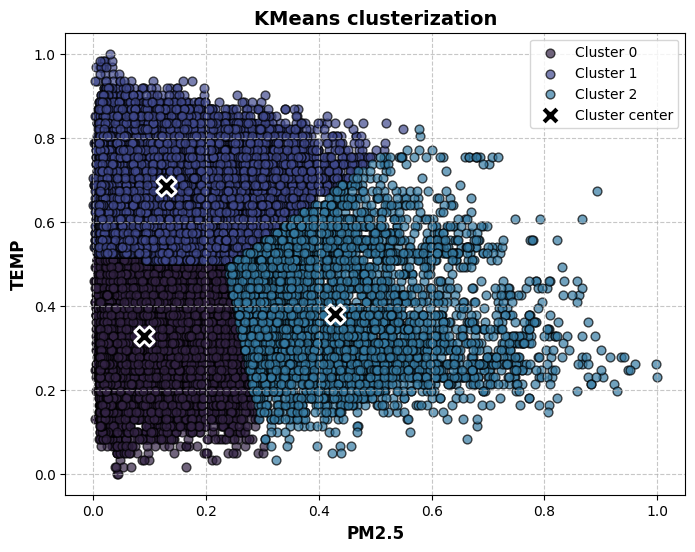

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df[["PM2.5", "TEMP"]])
df["kmeans_cluster"] = kmeans.labels_

display_clusterization_results(df, "PM2.5", "TEMP", kmeans.labels_, kmeans.cluster_centers_, "KMeans")

In [40]:
kmeans_stats = (
    df["kmeans_cluster"]
    .value_counts()
    .reset_index(name="count")
    .assign(
        center_x=lambda d: kmeans.cluster_centers_[:, 0],
        center_y=lambda d: kmeans.cluster_centers_[:, 1]
    )
)

print_df(kmeans_stats)

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃   kmeans_cluster ┃   count ┃   center_x ┃   center_y ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                1 ┃   21094 ┃   0.089335 ┃   0.328969 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                0 ┃   15431 ┃   0.1281   ┃   0.684025 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                2 ┃    5207 ┃   0.42781  ┃   0.38109  ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━┛


**Hierarchical Clustering**

In [41]:
linkage_matrix = linkage(df[['PM2.5','TEMP']], method='ward', metric="euclidean")

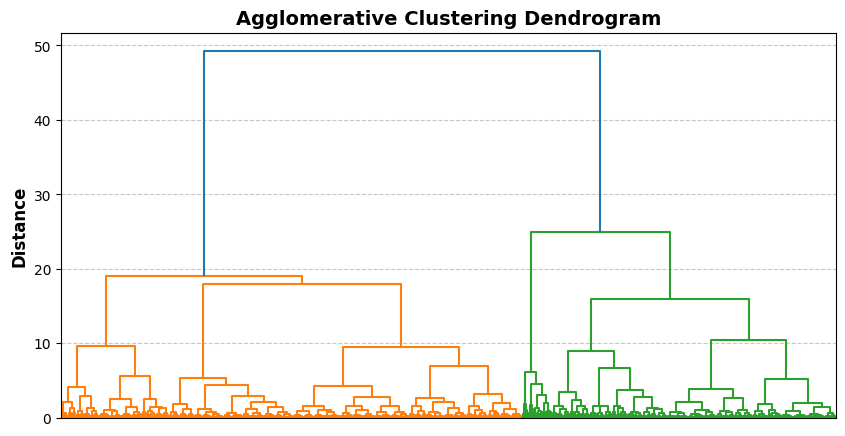

In [42]:
plt.figure(figsize=(10, 5))
dendrogram(
    linkage_matrix,
    leaf_font_size=10,
    color_threshold=None,
)

plt.title('Agglomerative Clustering Dendrogram', fontweight="bold", fontsize=14)
plt.ylabel('Distance', fontweight="bold", fontsize=12)
plt.xticks([])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [43]:
# Looking on dendogram we choose the vertical lines with biggest clusters distance; 
# most interesting for us is blue 19-49 and green 6-26, so we will a draw horizonal line to intersect both of them
# after that we have 3 intersection points, so we are going to use 3 clusters 
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_clustering.fit(df[['PM2.5', 'TEMP']])
df["agglomerative_cluster"] = agglomerative_clustering.labels_
agglomerative_centers = df.groupby("agglomerative_cluster")[["PM2.5", "TEMP"]].mean().to_numpy()

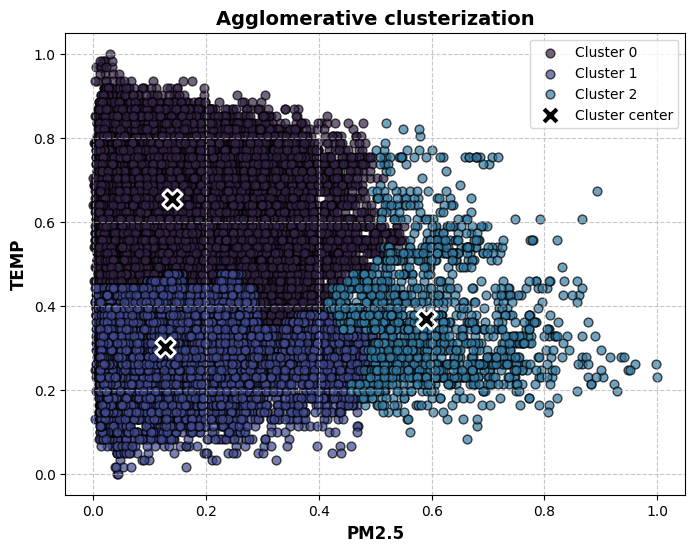

In [44]:
display_clusterization_results(df,'PM2.5', 'TEMP', np.array(agglomerative_clustering.labels_),agglomerative_centers,clusterization_type="Agglomerative")

In [45]:
df["agglomerative_cluster"] = agglomerative_clustering.labels_

agglomerative_stats = (
    df["agglomerative_cluster"]
    .value_counts()
    .reset_index(name="count")
    .assign(
        center_x=lambda d: agglomerative_centers[:, 0],
        center_y=lambda d: agglomerative_centers[:, 1]
    )
)

print_df(agglomerative_stats)

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃   agglomerative_cluster ┃   count ┃   center_x ┃   center_y ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                       0 ┃   24872 ┃   0.138507 ┃   0.654764 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                       1 ┃   15290 ┃   0.127145 ┃   0.302454 ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                       2 ┃    1570 ┃   0.590193 ┃   0.36926  ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━┛


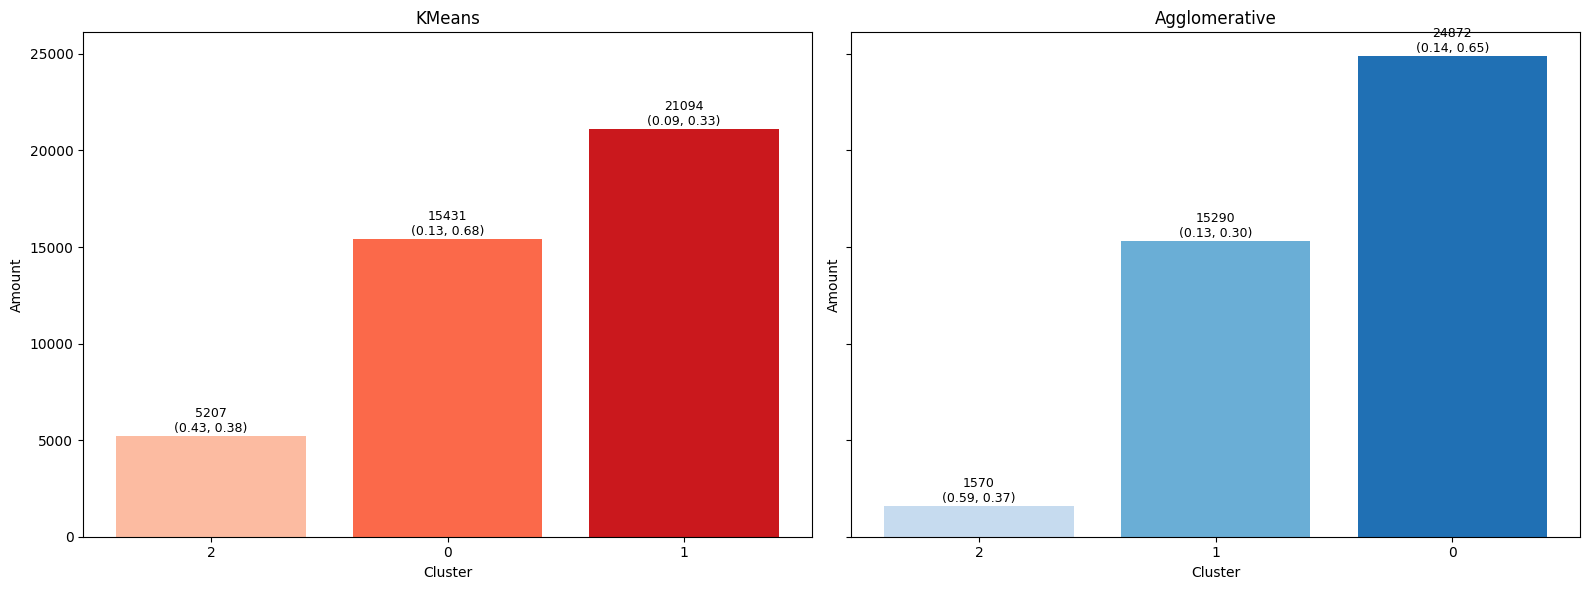

In [46]:
def plot_cluster(ax, df, cluster_col, count_col, center_x_col, center_y_col, title, cmap):
    df_sorted = df.sort_values(count_col)
    colors = sns.color_palette(cmap, len(df_sorted))
    bars = ax.bar(df_sorted[cluster_col].astype(str), df_sorted[count_col], color=colors)
    
    for bar, count, cx, cy in zip(bars, df_sorted[count_col], df_sorted[center_x_col], df_sorted[center_y_col]):
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            bar.get_height() + 50,
            f'{count}\n({cx:.2f}, {cy:.2f})',
            ha='center', va='bottom', fontsize=9
        )
    
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Amount')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

plot_cluster(
    axes[0], kmeans_stats, 
    'kmeans_cluster', 'count', 'center_x', 'center_y','KMeans', 'Reds'
)

plot_cluster(
    axes[1], agglomerative_stats, 
    'agglomerative_cluster', 'count', 'center_x', 'center_y','Agglomerative', 'Blues'
)

plt.tight_layout()
plt.show()


In [47]:
def add_std_to_stats(df_main, cluster_col, stats_df, features):
    cluster_std = []
    for cluster in stats_df[cluster_col].values:
        cluster_points = df_main[df_main[cluster_col] == cluster]
        stds = {f"{feat}_std": cluster_points[feat].std() for feat in features}
        cluster_std.append(stds)
    
    std_df = pd.DataFrame(cluster_std)
    stats_with_std = pd.concat([stats_df.reset_index(drop=True), std_df], axis=1)
    return stats_with_std


print_df(add_std_to_stats(df, 'kmeans_cluster', kmeans_stats, ['PM2.5','TEMP']))
print_df(add_std_to_stats(df, 'agglomerative_cluster', agglomerative_stats, ['PM2.5','TEMP']))


┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃   kmeans_cluster ┃   count ┃   center_x ┃   center_y ┃   PM2.5_std ┃   TEMP_std ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                1 ┃   21094 ┃   0.089335 ┃   0.328969 ┃   0.0909957 ┃  0.0908401 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                0 ┃   15431 ┃   0.1281   ┃   0.684025 ┃   0.0708469 ┃  0.105056  ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃                2 ┃    5207 ┃   0.42781  ┃   0.38109  ┃   0.131574  ┃  0.129536  ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━┻━━━━━━━━━━━━━┻━━━━━━━━━━━━┛
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃   agglomerative_cluster ┃   count ┃   center_x ┃   center_y ┃   PM2.5_std ┃   TEMP_std ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━━

In [48]:
df.to_csv('beijing_pm_2_5_cleared_clustered.csv', index=False)